Exploratory Data Analysis and Visualization:

Here I will load the libraries required to read and manipulate data using R

In [42]:
library(repr)
library(tidyverse)
library(dplyr)

Here I will use the read_csv function to read the the datasets "players.csv" and "sessions.csv" in which data are seperated by commas and assign the reading of these data sets to the objects players_raw and sessions_raw respectively. Then I will display the first 5 rows of the raw, pre-wrangled data sets with the function "head".

In [43]:
players_raw <- read_csv("https://raw.githubusercontent.com/Loganshea/Individual-Project/refs/heads/main/players.csv")
sessions_raw <- read_csv("https://raw.githubusercontent.com/Loganshea/Individual-Project/refs/heads/main/sessions.csv")
head(players_raw,5)
head(sessions_raw,5)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience subscribe
1 Pro         TRUE    
2 Veteran     TRUE    
3 Veteran    FALSE    
4 Amateur     TRUE    
5 Regular     TRUE    
  hashedEmail                                                      played_hours
1 f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d 30.3        
2 f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9  3.8        
3 b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28  0.0        
4 23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5  0.7        
5 7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e  0.1        
  name      gender Age
1 Morgan    Male    9 
2 Christian Male   17 
3 Blake     Male   17 
4 Flora     Female 21 
5 Kylie     Male   21

hashedEmail                                                     
1 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
2 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
3 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
4 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
5 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
  start_time       end_time         original_start_time original_end_time
1 30/06/2024 18:12 30/06/2024 18:24 1.71977e+12         1.71977e+12      
2 17/06/2024 23:33 17/06/2024 23:46 1.71867e+12         1.71867e+12      
3 25/07/2024 17:34 25/07/2024 17:57 1.72193e+12         1.72193e+12      
4 25/07/2024 03:22 25/07/2024 03:58 1.72188e+12         1.72188e+12      
5 25/05/2024 16:01 25/05/2024 16:12 1.71665e+12         1.71665e+12

Because the raw "players.csv" data set is already tidy, the raw "sessions.csv" data set is the only data that must be altered in order for it to be easily used for other tasks. In both the start_time and end_time colums, there are values for both the date and time of the respective start of session or end of session instances. These dates should be in seperate colums than the times for both the start and end of sessions so that each cell has only one value. I will use the "seperate" function to do this for both colums, and assign both the tidy sessions and players data sets to objects "sessions_tidy" and "players_tidy" respectively.

In [44]:
sessions_tidy <- sessions_raw |>
    separate(col = start_time, 
            into = c("start_date" , "start_time"),
            sep = " "
            ) |>
    separate(col = end_time, 
            into = c("end_date" , "end_time"), 
            sep = " "
            )
players_tidy <- players_raw

head(players_tidy,5)
head(sessions_tidy,5)

experience subscribe
1 Pro         TRUE    
2 Veteran     TRUE    
3 Veteran    FALSE    
4 Amateur     TRUE    
5 Regular     TRUE    
  hashedEmail                                                      played_hours
1 f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d 30.3        
2 f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9  3.8        
3 b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28  0.0        
4 23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5  0.7        
5 7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e  0.1        
  name      gender Age
1 Morgan    Male    9 
2 Christian Male   17 
3 Blake     Male   17 
4 Flora     Female 21 
5 Kylie     Male   21

hashedEmail                                                      start_date
1 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf 30/06/2024
2 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686 17/06/2024
3 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc 25/07/2024
4 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf 25/07/2024
5 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686 25/05/2024
  start_time end_date   end_time original_start_time original_end_time
1 18:12      30/06/2024 18:24    1.71977e+12         1.71977e+12      
2 23:33      17/06/2024 23:46    1.71867e+12         1.71867e+12      
3 17:34      25/07/2024 17:57    1.72193e+12         1.72193e+12      
4 03:22      25/07/2024 03:58    1.72188e+12         1.72188e+12      
5 16:01      25/05/2024 16:12    1.71665e+12         1.71665e+12

Now, using the tidy data, I will compute the mean values for the "played_hours" and "age" colums in the "players_tidy" data set using the function "summerize". Because there are values entered as NA, and I want the function to skip these values and average all the others, I will follow the "mean" calculation with "na.rm = TRUE". 

In [45]:
players_mean <- players_tidy |>
    summarize(
        mean_played_hours = mean(played_hours, na.rm = TRUE),
        mean_age = mean(Age, na.rm = TRUE)
        )
players_mean

mean_played_hours mean_age
1 5.845918          20.52062

The resulting averages are as follows:
| Average Time Played (hours) | Average Age of Player (years)|
|---|---|
|5.86|20.5|

To explore how the data will help answer my specific question of wether age is a good gauge of how much  time a player will spend playing the game, I created this scatterplot to map the two variables side by side.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


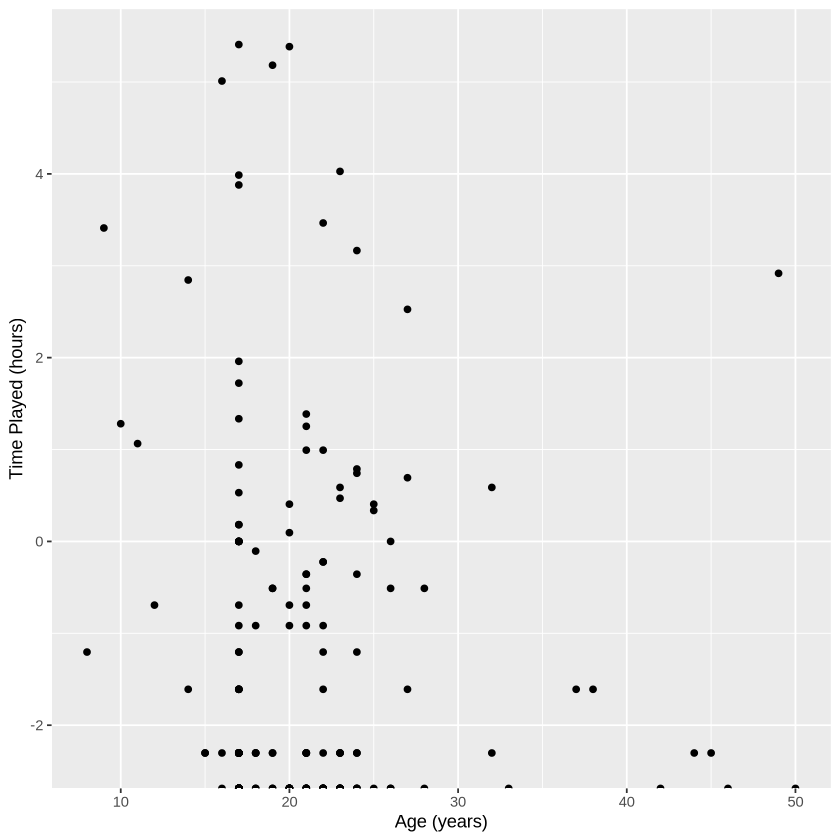

In [46]:
hours_vs_age_scatterplot <- players_tidy |>
    mutate(played_hours = log(played_hours)) |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point() +
    labs(x = "Age (years)", y = "Time Played (hours)")

hours_vs_age_scatterplot

Data Description:
The players.csv dataset contains data describing each player participating in the study. Each observation in the set corresponds to a unique player. Each column represents one of 7 variables that provide information about each player. The columns containing information about these players are as follows:
-experience (character): One of either Pro, Veteran, Amateur, or Regular depending on their experience playing the game.
-subscribe (logical): TRUE if they are subscribed to a gaming newsletter, FALSE if they are not.
-hashedEmail (character): Encoded email address of the individual.
-played_hours (double): The total number of hours the individual has played since joining the study.
-name (character): The name of the individual.
-gender (character): The gender of the individual.
-Age (double): The age of the individual in years.

Questions:
The broad question I am addressing is what characteristics about an individual can be focused on during the recruitment process that will result in the recruitment of individuals that will provide the most data. Specifically I examined whether the age of the individual could be used to predict the hours said individual spent playing the game, assuming hours spent playing directly correlates with data gathered. In this instance the explanatory variable would be the age of the player and the response variable would be the hours that the player spends playing. The K nearest neighbour method can be used to determine if an individual will play for very long based on their age. Minimal wrangling would be required other than scaling the hours played data.

Methods:
The method chosen is K nearest neighbor. This method is appropriate because I am trying to determine the value of one quantitative variable based on the age of an individual. In order for this method to be relevant the assumptions made are that time spent playing is proportional to the data gathered. The limitations to this method are that the predicted variable is only predicted using a single other variable, meaning that if there are inconsistent data values in the same area, there isn’t a second explanatory variable that could smooth out the prediction, the prediction could simply be inaccurate. At the start 20% of the data will imeadiatly be separated so it can be used as the real test for the model after the model has been trained. Then, the remaining data will be split into three and a model will be trained with each data set individually. Then a fourth model will be trained with all the the test data. After each of these four models is tested using the hidden data from the beginning, the accuracy of the three models trained on less data can be compared to the accuracy of the model trained on all of the data. Using the difference between these accuracies, the theoretical accuracy of a model trained on more or less data could be determined.